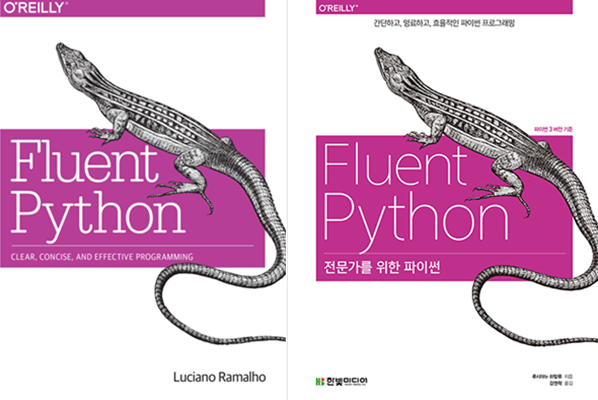

# **Chapter 9. 파이썬스러운 객체(Pythonic Object)**

Fluent Python   
9장 Pythonic Object

Bowon Kwon  
2023년 3월 26일 발제

# 들어가며

* **파이썬 데이터 모델(1장)** 덕분에, **사용자가 정의한 자료형**도 **내장 자료형**처럼 자연스럽게 동작

* 상속하지 않고도 **덕 타이핑(Duck typing) 메커니즘** 통하여 가능

* **덕 타이핑:**
 * (책 851쪽 용어 사전) 객체의 클래스나 인터페이스 선언에 상관없이 메서드를 적절히 구현하면 어떤 객체에도 함수를 호출할 수 있는 다형성의 한 형태
 * **동적 타이핑**을 지원하는 언어에서 사용되는 개념으로, 객체의 실제 타입을 명시적으로 검사하지 않고 **객체가 가진 메서드나 속성을 사용하여 객체의 적합성을 판단**하는 프로그래밍 방식
 * 즉, 객체가 어떤 타입에 걸맞은 변수와 메소드를 가지면 해당 객체를 특정한 타입에 속하는 것으로 간주
 * "If it **walks** like a duck and it **quacks** like a duck, then it must be a duck."이라는 말에서 유래
 * 예컨대, 어떤 객체가 오리처럼 walk(), quack() 메서드를 가지고 있으면 그 객체가 Duck 클래스에서 파생되었는지와 무관하게 그 객체를 오리로 취급할 수 있음

 * **장점**
   * 객체의 실제 타입을 명시적으로 지정할 필요가 없고 검사할 필요도 없없기 때문에, **코드의 유연성과 재사용성**을 높일 수 있음
   * 객체의 인터페이스에만 의존하므로 **다형성**을 쉽게 구현할 수 있음
   * 객체의 타입을 변경하거나 확장해도 기존 코드에 영향을 미치지 않음
 * **단점**
   * 객체가 가진 메서드나 속성이 적절한지를 런타임 시점에야 비로소 알게 되어 오류를 발견하기 어려울 수 있음
   * 객체의 타입을 명시하지 않으므로 코드를 이해하거나 문서화하기 어려울 수 있음
   * 객체의 인터페이스가 충돌할 가능성이 있으므로 주의해야 함

 * 출처(Bing): https://ko.wikipedia.org/wiki/%EB%8D%95_%ED%83%80%EC%9D%B4%ED%95%91 ; https://realpython.com/lessons/duck-typing/ ; https://stackoverflow.com/questions/4205130/what-is-duck-typing

In [ ]:
class Duck:
    def swim(self):
        print("Duck swimming")

    def fly(self):
        print("Duck flying")

class Whale:
    def swim(self):
        print("Whale swimming")

for animal in [Duck(), Whale()]:
    animal.swim()
    animal.fly()

# 영문 위키 https://en.wikipedia.org/wiki/Duck_typing 예제
# Whale 클래스는 fly 메서드 갖지 않으므로 animal.fly()는 AttributeError
# 수영할 수 있는 모든 것을 오리로 보기로 하면 고래도 오리로 간주되겠지만, 오리는 날 수도 있어야 한다고 보게 되면 고래는 오리로 간주되지 않을 것

Duck swimming
Duck flying
Whale swimming


AttributeError: ignored

In [ ]:
# 국문 위키 https://ko.wikipedia.org/wiki/%EB%8D%95_%ED%83%80%EC%9D%B4%ED%95%91 예제

class Duck:
    def quack(self):
        print("꽥꽥!")
    def feathers(self):
        print("오리에게 흰색, 회색 깃털이 있습니다.")

class Person:
    def quack(self):
        print("이 사람이 오리를 흉내내네요.")
    def feathers(self):
        print("사람은 바닥에서 깃털을 주워서 보여 줍니다.")

def in_the_forest(duck):
    duck.quack()
    duck.feathers()

def game():
    donald = Duck()
    john = Person()
    in_the_forest(donald)
    in_the_forest(john)

# 이하는 ChatGPT가 제시한 설명...
   # Duck, Person 클래스 각각 quack(), feathers() 두 개 메서드 가지나, 각자 출력하는 내용은 다름
   # in_the_forest() 함수는 'duck' 인자 받아 quack(), feathers() 메서드 출력
   # game() 함수는 Duck() 클래스의 인스턴스인 'donald', Person() 클래스의 인스턴스인 'john' 생성하고 in_the_forest() 함수 두 번 호출하는데 한 번은 'donald'를 인자로, 다른 한 번은 'john'을 인자로 호출
   # 이것은 파이썬에서 "다형성(polymorphism)"의 한 예로, 다른 객체들이 같은 메서드나 속성을 가지고 있을 때 서로 교환해서 사용할 수 있다는 것을 의미
# 위 코드는 오리와 사람의 quack, feathers 메서드를 문제 없이 출력
# 그러나 C++ 같은 정적 타입에서는 제네릭을 활용해야 함 (아래 코드 출처: https://library-of-k.tistory.com/276)

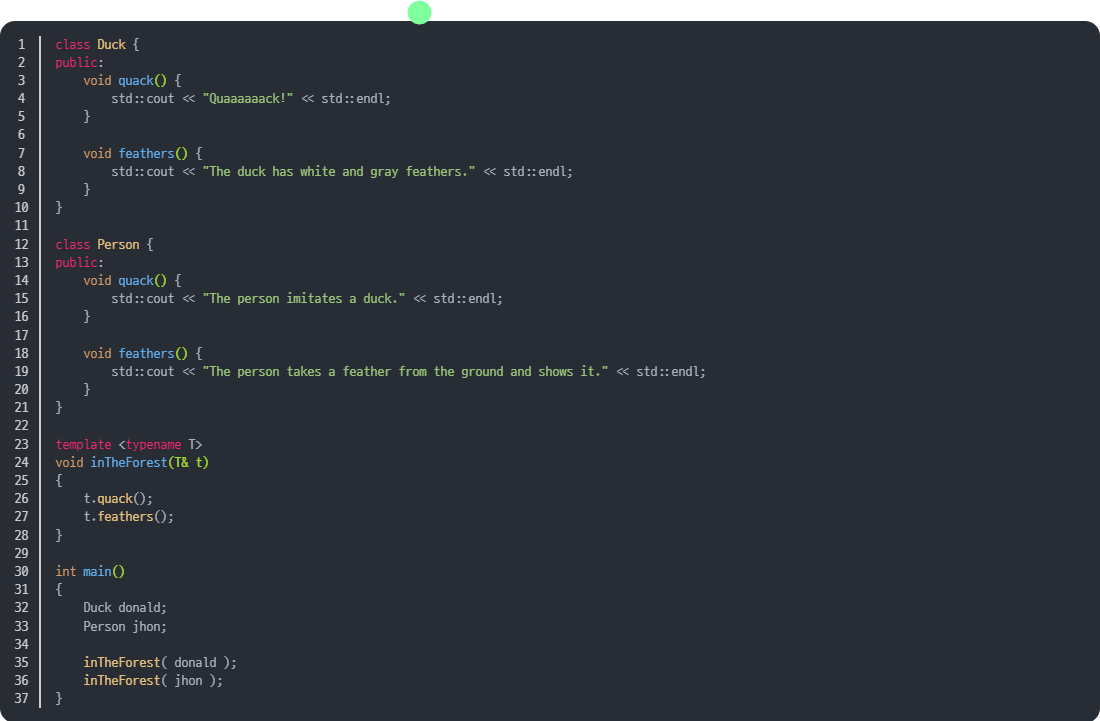

* **(참고) 파이썬의 다형성(polymorphism)** (Bing)
 * 서로 다른 타입의 객체들이 같은 이름의 메소드를 가지고 있을 때, 그 객체들을 동일한 방식으로 사용할 수 있는 것을 의미
 * 예컨대, + 연산자는 정수나 문자열과 같은 다른 타입의 객체들에 적용할 수 있고, 상속관계에 있는 클래스들은 부모 클래스의 메서드를 자식 클래스에서 재정의(override)하여 다형성을 구현할 수 있음
 * 출처(Bing): https://www.geeksforgeeks.org/polymorphism-in-python/ ; https://www.programiz.com/python-programming/polymorphism ; https://www.digitalocean.com/community/tutorials/how-to-apply-polymorphism-to-classes-in-python-3

* **(참고) C++에서 제네릭(generic)** (Bing)
  * 다른 타입의 데이터에 대해 동일한 로직을 적용할 수 있는 코드를 작성하는 방법
  * 예컨대, 정수나 실수와 같은 다른 타입의 데이터를 정렬하는 함수를 작성할 때, 제네릭을 사용하면 하나의 함수로 여러 타입의 데이터를 처리할 수 있음
  * C++에서 제네릭을 구현하는 방법은 템플릿(template)을 사용하는 것으로, 템플릿은 데이터 타입을 매개변수로 받아서 컴파일 시점에 적절한 타입으로 치환해주는 기능
  * 출처(Bing): https://www.geeksforgeeks.org/generics-in-c/ ; https://learn.microsoft.com/en-us/cpp/extensions/overview-of-generics-in-visual-cpp?view=msvc-170 ; https://en.cppreference.com/w/c/language/generic ; https://stackoverflow.com/questions/3862378/what-is-the-meaning-of-generic-programming-in-c ; https://www.geeksforgeeks.org/templates-cpp/

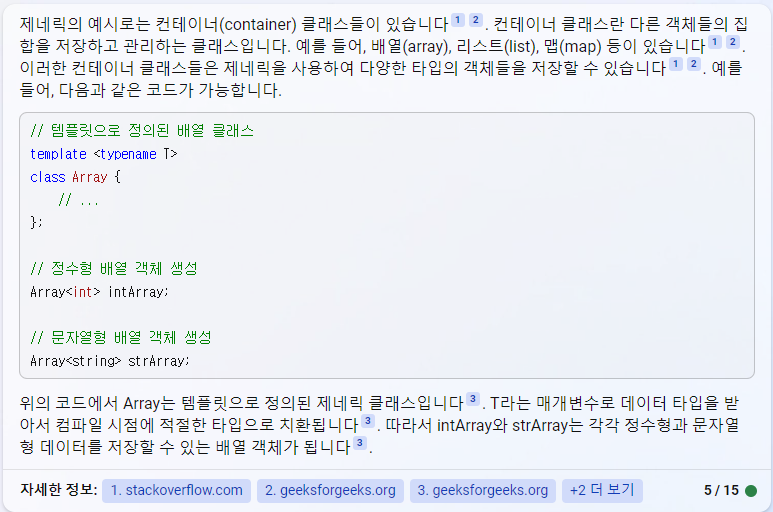

* 10장의 위치와와 개요
 * 지금까지는 여러 **내장 객체**의 구조와 동작 설명
 * 이하에서는 실제 파이썬 객체와 동일하게 작동하는 **사용자 정의 클래스**를를 만들고,
 * 1장에 이어 여러 파이썬 객체에서 흔히 볼 수 있는 여러 **특별 메서드(magic method)**를 구현하는 방법을 소개
 * 간단한 **2차원 유클리드 벡터형**을 개선하면서 점진적으로 파이썬스러운 객체를 만들어 나가고, 다음 두 가지 개념적 주제를 설명
   * 언제, 어떻게 @classmethod와 @staticmethod 데커레이터를 사용할 것인가
   * 파이썬에서의 비공개 및 보호된 속성: 사용법, 관례, 한계

# 9.1 객체 표현(Object Representations)


* **repr()**
  * 객체를 개발자가 보고자 하는 형태로 표현한 문자열로 반환

In [ ]:
def __repr__(self):
  class_name = type(self).__name__                      # 객체의 클래스 이름 구현
  return '{}({!r}, {!r})'.format(class_name, *self)     # 클래스 이름과 객체 속성 포함하는 문자열 만드는데, 이때 *self는 self가 가진 모든 속성을 언패킹하여 format() 함수에 전달
                                                        # {!r}은 각 속성에 repr() 함수를 적용하여 문자열로 변환

In [ ]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __repr__(self):
    cls = self.__class__.__name__
    return f'{cls}(x={self.x!r}, y={self.y!r})'

In [ ]:
# 이때 p = Point(3, 4)라는 객체를 생성하고 repr(p)를 호출하면, Point 클래스의 생성자에 3과 4를 전달하여 p와 동일한 객체를 만들 수 있는 실행 가능한 문자열

p = Point(3, 4)
repr(p)

'Point(x=3, y=4)'

* **str()**
  * 객체를 사용자가 보고자 하는 형태로 표현한 문자열로 반환

In [ ]:
def __str__(self):
  return str(tuple(self))

* **repr 메서드와 str 메서드의 차이점** (Bing)
  * repr 메서드
     * 객체를 컴퓨터가 구분할 수 있는 형태로 표현하는 데 사용
     * 인수로 문자열을 입력받아 따옴표로 감싼 문자열 형태로 반환하여 리턴
     * 예컨대,  **repr() 함수**나 **역따옴표(``)**에 객체를 전달하면 repr 메서드가 호출
     * 가능하면 객체와 동일한 값을 생성할 수 있는 실행 가능한 문자열을 반환하는 것이 좋음. 즉, 파이썬 인터프리터에 문자열을 입력하면 객체가 다시 만들어질 수 있도록 하는 것
     * 보통 클래스 이름과 속성들을 포함하는 문자열을 반환
     * repr() 함수로 변환된 값은 **eval() 함수의 입력값이 될 수 있음**
  * str 메서드
     * 객체를 사람이 읽기 쉬운 형태로 표현하는 데 사용
     * 문자열로 변환되나 따옴표가 붙지 않음
     * 예컨대, **print() 함수**나 **str() 함수**에 객체를 전달하면 str 메서서드가 호출
     * 객체의 주요 정보나 특징을 간결하고 명확하게 보여주는 문자열을 반환하는 것이 좋음
     * str() 함수로 변환된 값은 **eval() 함수의 입력값이 될 수 없음**
  * 출처: https://shoark7.github.io/programming/python/difference-between-__repr__-vs-__str__ ; https://stackoverflow.com/questions/3691101/what-is-the-purpose-of-str-and-repr ; https://www.digitalocean.com/community/tutorials/python-str-repr-functions ; https://stackoverflow.com/questions/1436703/what-is-the-difference-between-str-and-repr ; https://sparkbyexamples.com/python/python-difference-between-__str__-and-__repr__/ ; https://www.pythonforbeginners.com/basics/__str__-vs-__repr

* **(참고) eval()**
   * 인수로 실행 가능한 '문자열 식'을 입력받아 '문자열 식'을 실행한 결괏값을 리턴
   * 인수로 따옴표로 감싼 내장함수를 입력받으면 내장함수를 실행한 결괏값을 리턴

* **bytes()**
  * 객체를 바이트 시퀀스로 표현

In [ ]:
def __bytes__(self):
  return (bytes([ord(self.typecode)]) +
          bytes(array(self.typecode, self)))

* **format()**
  * 특별 포맷 코드를 이용해서 객체를 표현하는 문자열 반환

# 9.2 벡터 클래스의 부활(Vector Class Redux)

In [ ]:
# 예제 9-2
# magic method로 파이썬 내장형 데이터 모델처럼 내장형 함수를 사용할 수 있게 된다.

from array import array
import math

class Vector2d:
    typecode = 'd'  # typecode는 Vector2d와 bytes 간 변환에 사용하는 클래스 속성. typecode 'd'는 배밀도 실수(double-precision floats, 책 92쪽)

    def __init__(self, x, y):
        self.x = float(x)    # __init__() 안에서 x, y를 float로 변환하면 부적절한 인수로 Vector2d 객체 생성하는 경우 조기에 에러를 잡는 데 유용
        self.y = float(y)

    def __iter__(self):
        return (i for i in (self.x, self.y))  # __iter__()를 구현하면 Vector2d 반복 가능. 그렇기 때문에 x, y = my_vector처럼 쓸 수 있음
                                              # 이 메서드는 제너레이터 표현식을 이용해서 요소를 차례대로 하나씩 생성

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)  # __repr__()은 {!r}을 각 요소에 repr()을 호출해서 반환된 문자열로 치환해 문자열로 만든다.
                                                           # Vector2d를 반복할 수 있으므로, *self는 format()에 x와 y 속성 공급

    def __str__(self):
        return str(tuple(self))  # 반복형 Vector2d에서 튜플 만들어 순서쌍으로 출력

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +       # bytes를 생성하기 위해 typecode를 bytes로 변환
                bytes(array(self.typecode, self)))  # 그리고 이것을 객체를 반복해서 생성한 배열에서 변환된 bytes와 연결

    def __eq__(self, other):
        return tuple(self) == tuple(other)  # 모든 속성을 비교하기 위해 피연산자로부터 튜플 생성. Vector2d 객체를 피연산자로 사용하면 작동하지만 문제가 있다.
                                            # (책 327쪽 Caution) 동일한 숫자값을 가진 어떠한 반복형 객체도 Vector2d 객체와 비교하면 True를 반환(예를 들면, Vector(3, 4) == [3, 4])

    def __abs__(self):
        return math.hypot(self.x, self.y)  # magnitude()는 x와 y로 만들어진 직삼각형 사변의 길이

    def __bool__(self):
        return bool(abs(self))  # __bool__()은 abs(self)를 사용해서 사변 길이 계산하고 불리언형으로 변환. 따라서 0.0은 False, 그 외 값은 True

In [ ]:
# 예제 9-1 다양하게 표현되는 Vector2d 객체

v1 = Vector2d(3, 4)
print(v1.x, v1.y)     # Vector2d 요소들은 게터 메서드를 호출할 필요 없이 직접 속성에 접근할 수 있음

3.0 4.0


In [ ]:
str(v1)

'(3.0, 4.0)'

In [ ]:
x, y = v1  # __iter__의 영향, Vector2d를 변수들의 튜플에 언패킹할 수 있다.
x, y

(3.0, 4.0)

In [ ]:
v1  # Vectro2d의 repr()은 객체를 생성하는 소스 코드와 같은 형태를 출력

Vector2d(3.0, 4.0)

In [ ]:
repr(v1)

'Vector2d(3.0, 4.0)'

In [ ]:
v1_clone = eval(repr(v1))  # eval()을 이용해서 Vector2d의 repr()이 생성자 호출을 제대로 표현했는지 확인
                           # --> repr()를 강조하기 위해 eval() 함수를 사용하여 객체를 복사했으나, copy.copy()를 통해 보다 빠르고 안전하게 객체를 복사할 수 있음
v1 == v1_clone             # Vector2d는 == d연산자를 이용한 비교를 지원, 이는 객체 비교에 유용, __eq__

True

In [ ]:
print(v1)  # print()는 str()을 호출하며, str()은 Vector2d 객체의 경우 순써쌍을 생성

(3.0, 4.0)


In [ ]:
octets = bytes(v1)  # bytes()는 __bytes__() 메서드를 이용해서 이진 표현을 생성
octets

b'd\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@'

In [ ]:
abs(v1)  # abs()는 __abs__() 메서드를 이용해서 Vector2d 객체의 크기를 반환

5.0

In [ ]:
bool(v1), bool(Vector2d(0, 0))  # bool()은 __bool__() 메서드 사용하며, Vector2d 객체 크기가 0이면 False, 아니면 True 반환

(True, False)

In [ ]:
print(repr(v1), str(v1), format(v1), bytes(v1))

Vector2d(3.0, 4.0) (3.0, 4.0) (3.0, 4.0) b'd\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@'


* **게터 메서드(getter method)** (Bing)

  * 객체 지향 프로그래밍에서 클래스의 인스턴스나 속성(attribute)의 값을 반환하는 메서드로,
  * 속성에 접근하거나 변경하려면 getter method와 setter method를 사용할 수 있고,
  * setter method는 속성의 값을 설정하는 메서드
  * 파이썬에서는 property()라는 내장 함수를 사용하여 getter method와 setter method를 정의할 수 있는데, property(fget, fset, fdel, doc)와 같이 사용할 수 있고, fget은 속성 값을 가져오는 함수, fset은 속성 값을 설정하는 함수, fdel은 속성을 삭제하는 함수, doc은 속성에 대한 설명을 나타냄
  * 출처: https://realpython.com/python-getter-setter/ ; https://stackoverflow.com/questions/2627002/whats-the-pythonic-way-to-use-getters-and-setters ; https://www.geeksforgeeks.org/getter-and-setter-in-python/

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name          # 밑줄(_)로 시작하는 변수는 비공개(private) 변수로 간주

    def get_name(self):            # getter method
        return self._name

    def set_name(self, new_name):  # setter method
        self._name = new_name

    name = property(get_name, set_name) # name이라는 property 객체 생성

p = Person("Alice")
print(p.name)                     # Alice 출력, get_name() 메서드 호출
p.name = "Bob"                    # name 속성을 변경, set_name() 메서드 호출
print(p.name)                     # Bob 출력, get_name() 메서드 호출

Alice
Bob


In [ ]:
# 참고 예제 1-2 간단한 2차원 벡터 클래스

from math import hypot

class Vector:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)

    def __abs__(self):
        return hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

# 9.3 대안 생성자(An Alternative Constructor)

* 지금까지 기본적인 메서드를 거의 구현했지만, bytes()로 생성한 이진 표현에서 Vector2d 객체를 다시 만드는 메서드가 없다
* Vector2d를 bytes로 변환하는 메서드가 있었으니, 당연히 역으로 bytes를 Vector2d로 변환하는 메서드도 있어야 할 것

In [ ]:
from array import array
import math

class Vector2d:
    typecode = 'd' # Vector2d와 bytes 간의 변환에 사용하는 클래스 속성

    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y) # 미리 실수로 변환하는 센스

    def __iter__(self): # 이걸 구현하면 x,y = my_vector 처럼 쓸 수 있다.
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)])+
               bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    @classmethod                                      # 클래스 메서드에는 @classmethod 데커레이터가 붙는다
    def frombytes(cls, octets):                       # self 매개변수가 없고, 대신 클래스 자신이 cls 매개변수로 전달
        typecode = chr(octets[0])                     # 첫 번째 바이트에서 typecode를 읽는다
        memv = memoryview(octets[1:]).cast(typecode)  # octet 이진 시퀀스로부터 memoryview를 생성하고 typecode를 이용해서 형을 변환
        return cls(*memv)                             # cast()가 반환한 memoryview를 언패킹해서 생성자에 필요한 인수로 전달

In [ ]:
v2 = Vector2d.frombytes(b'd\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@')
v2

Vector2d(3.0, 4.0)

In [ ]:
v1 == v2  # 따라서, 바이트코드로 정의해도 동일한 결과를 얻을 수 있다

True

* **메모리 뷰**
  *  **(책 95쪽, 2.9.2.)** 공유 메모리 시퀀스형으로서 bytes를 복사하지 않고 배열의 슬라이스를 다룰 수 있게 해준다. memoryview.cast() 메서드는 바이트를 이동시키지 않고 여러 바이트로 된 데이터를 읽거나 쓰는 방식을 바꿀 수 있게 해주고, 같은 메모리를 공유하는 또 다른 memoryview 객체를 반환
  * **(Bing)**
     *  다양한 데이터 유형의 메모리 버퍼(buffer)에 대한 안전하고 효율적인 접근 방법을 제공하는 객체로, memoryview()라는 내장 함수를 사용하거나 memoryview 클래스의 생성자를 호출하여 만들 수 있음
     * C 언어와 같은 저수준(low-level)의 메모리 조작을 가능하게 함
     * 메모리 뷰는 원본 데이터에 대한 참조(reference)만 가지고 있으므로 복사(copy)나 할당(assignment) 등 연산을 수행할 때 메모리 공간을 추가로 사용하지 않아 데이터 처리 속도와 성능을 향상시킬 수 있음
     * 또한 메모리 뷰는 원본 데이터가 변경 가능(mutable)하면 변경도 가능하며, 슬라이싱(slicing), 인덱싱(indexing), 반복(iterating), 포매팅(formatting) 등의 연산도 지원
     * 다차원(dimensional), 다중바이트(multibyte), 비연속(non-contiguous) 등 복잡한 구조(structure)의 데이터에도 적용할 수 있고, 이때 shape, strides, itemsize 등 속성(attribute)을 사용하여 데이터의 모양(shape), 간격(stride), 크기(size) 등을 확인하거나 변경할 수 있음
     * 출처: https://python101.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%ACPython-memoryview-%EC%82%AC%EC%9A%A9%EB%B2%95-%EC%A0%95%EB%A6%AC ; https://docs.python.org/3/c-api/memoryview.html ; https://www.w3schools.com/python/ref_func_memoryview.asp

**(보충)**

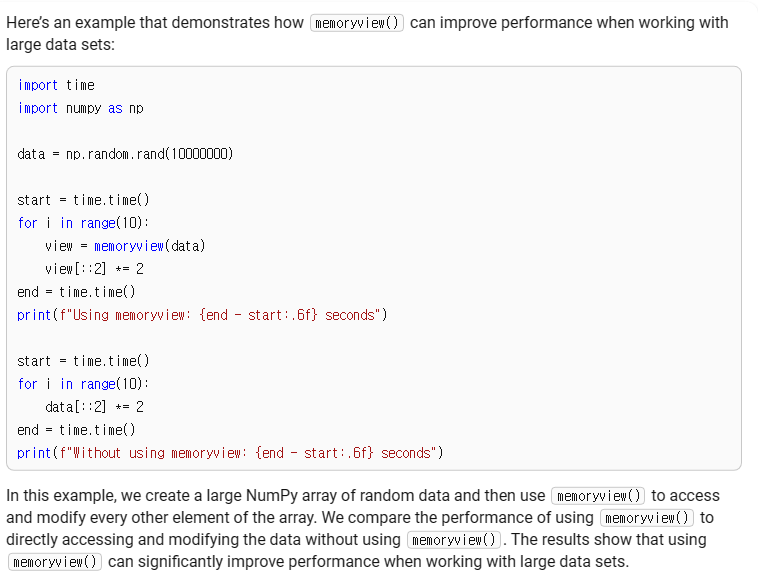

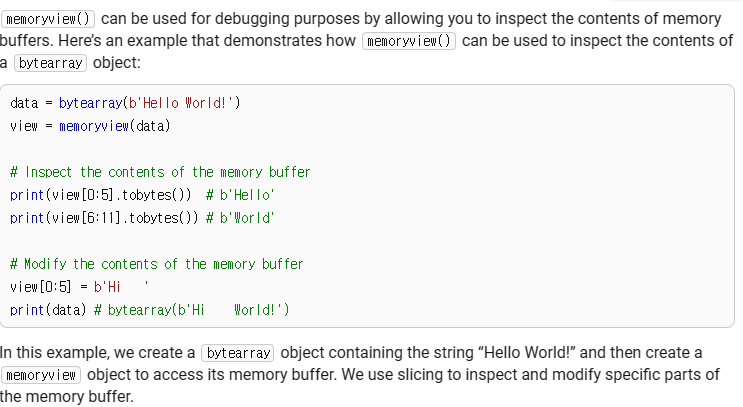

# 9.4 @classmethod와 @staticmethod

* **@classmethod 데커레이터**
   * 객체가 아닌 클래스에, 연산을 수행하는 메서드를 정의
   * 클래스 자체를 첫 번째 인수로 받게 만들고,
   * frombytes() 같은 대안 생성자를 구현하기 위해 주로 사용
   * 위 예제에서는 마지막 문장에서 cls(*memv)는 객체를 생성하기 위해 cls 인수를 이용해서 실제로 클래스의 생성자를 호출
* **@staticmethod 데커레이터**
   * 메서드가 특별한 첫 번째 인수(special first argument)를 받지 않도록 메서드를 변경
   * 본질적으로, 모듈 레벨에서 정의되는 대신 클래스 본체 안에 정의된 평범한 함수일 뿐
   * 클래스나 객체를 직접적으로 사용하지 않으나 클래스 안에 두는 메서드로, 밖에서 정의해도 상관은 없고(출처: [Jordan Tech Lab](https://blog.doosikbae.com/entry/Fluent-Python-Chapter-9-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%8A%A4%EB%9F%AC%EC%9A%B4-%EA%B0%9D%EC%B2%B4)) 굳이 쓸 필요 없다? (출처: 책 329쪽 NOTE_, [lih0905 github](https://github.com/lih0905/Fluent_Python/blob/master/9%EC%9E%A5%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%8A%A4%EB%9F%AC%EC%9A%B4%20%EA%B0%9D%EC%B2%B4.ipynb), 반론: [Julien Danjou, "The Definitive Guide on How to Use Static, Class or Abstract Methods
in Python"](https://julien.danjou.info/guide-python-static-class-abstract-methods/))

In [ ]:
class Demo:
    @classmethod
    def klassmeth(*args):    # *args 나 아예 인수를 넣지 않는 경우는 자동으로 파이썬에서 cls를 첫 번째 인수로 추가하는 듯?? (출처: lih0905 github)
        return args          # klassmeth()는 모든 위치 인수를 보여준다
    @staticmethod
    def statmeth(*args):
        return args          # statmet()도 마찬가지

In [ ]:
Demo.klassmeth()             # 호출 방법과 무관하게 Demo.klassmeth()는 Demo 클래스를 첫 번째 인수로 받는다

(__main__.Demo,)

In [ ]:
Demo.klassmeth('spam')

(__main__.Demo, 'spam')

In [ ]:
Demo.statmeth()              # Demo.statmeth()는 단지 평범한 함수처럼 동작할 뿐이다

()

In [ ]:
Demo.statmeth('spam')

('spam',)

# 9.5 포맷된 출력(Formatted Displays)

* 출력 포맷을 지원하는 방법
* format() 내장함수와 str.format() 메서드는 실제 포맷 작업을 __ format __(format_spec) 메서드에 위임
* format_spec은 포맷 명시자(format specifier)로서, 다음 중 하나의 방법으로 지정
   * format(my_obj, format_spec)의 두 번째 인수, 포맷 명시자에 사용된 표기법을 ['포맷 명시 간이 언어(Format Specification Mini-Language'](https://docs.python.org/ko/3/library/string.html#formatspec)라 함
   * str.format()에 사용된 포맷 문자열 안에 {}로 구분한 대체 필드 안에서 콜론 뒤의 문자열, ['포맷 문자열 문법(Format String Syntax)'](https://docs.python.org/ko/3/library/string.html#formatstrings) 참조
      * 여기서 !s 는 값에 str() 을 호출하고, !r 은 값에 repr() 을 호출하고, !a 는 값에 ascii() 를 호출

In [ ]:
brl = 1/2.43          # 브라질 헤알을 미국 달러로 바꾸는 환율
brl

0.4115226337448559

In [ ]:
format(brl, '0.4f')   # '0.4f'가 포맷 명시자

'0.4115'

In [ ]:
'1 BRL = {rate:0.2f} USD'.format(rate=brl)    # '0.2f'가 포맷 명시자
                                              # 대체 필드 안에 있는 'rate' 문자열을 필드명이라 한다. 이 문자열은 포맷 명시자와 상관 없지만, format() 인수 중 어느 인수가 대체 필드에 들어갈 것인지를 결정

'1 BRL = 0.41 USD'

* int형 자료는 이진수를 나타내는 b, 16진수를 나타내는 x, float형 자료는 고정소수점 나타내는 f, 백분율을 나타내는 % 코드 지원

In [ ]:
format(42,'b')

'101010'

In [ ]:
format(2/3, '.1%')

'66.7%'

* datetime 모듈의 클래스들은 자신의 __format __() 메서드에서 strftime() 함수와 동일한 포맷 코드 사용

In [ ]:
from datetime import datetime
now = datetime.now()
format(now, '%H:%M:%S')

'11:02:07'

In [ ]:
"It's now {:%I:%M %p}".format(now)    # %I는 12시간제 기준?

"It's now 11:02 AM"

* 클래스에서 __format __() 메서드 정의하지 않으면, object에서 상속받은 메서드가 str(my_object) 반환

In [ ]:
v1 = Vector2d(3,4)
format(v1)

'(3.0, 4.0)'

In [ ]:
str(v1), repr(v1), v1

('(3.0, 4.0)', 'Vector2d(3.0, 4.0)', Vector2d(3.0, 4.0))

* 그러나 이때 포맷 명시자를 사용하면 object.__format __()은 TypeError 발생

In [ ]:
format(v1, '.3f')

TypeError: ignored

* Vector2d 클래스 자체의 포맷 간이 언어를 구현하면 해결할 수 있음
* 사용자가 제공하는 포맷 명시자를 벡터의 각 float형 요소를 포맷하기 위한 것이라고 가정

In [ ]:
from array import array
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)])+
               bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __format__(self, fmt_spec=''):
        components = (format(c, fmt_spec) for c in self)   # 벡터의 각 요소에 fmt_spec 포맷을 적용하기 위해 format() 내장함수를 호출하고, 포맷된 문자열의 반복형 생성
        return '({}, {})'.format(*components)              # 포맷된 문자열을 '(x, y)' 형식으로 만든다

In [ ]:
v1 = Vector2d(3,4)
v1

Vector2d(3.0, 4.0)

In [ ]:
str(v1)

'(3.0, 4.0)'

In [ ]:
format(v1)

'(3.0, 4.0)'

In [ ]:
format(v1,'.2f')

'(3.00, 4.00)'

In [ ]:
format(v1,'.3e')

'(3.000e+00, 4.000e+00)'

* Vector2d의 간이 언어에 포맷 코드 추가
   * 포맷 명시자가 'p'로 끝나면 벡터를 극좌표 <r, θ>로 표현
   * r은 벡터 크기, θ는 라디안으로 표현된 각
   * **(책 332쪽 Tip)** 다른 자료형에서 사용하는 코드와 중복되지 않는 코드를 선택하기 위해 'p' 선택
* 극좌표 생성
   * 크기 생성하는 __abs __() 메서드는 이미 있고,
   * 각 구하기 위해 math.atan2() 함수 사용하는 angle() 메서드를 구현

In [ ]:
from array import array
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)])+
               bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        return math.atan2(self.y, self.x)

    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):                          # 포맷 명시자가 'p'로 끝나면 극좌표를 사용
            fmt_spec = fmt_spec[:-1]                        # fmt_spec 마지막에 있는 'p'를 떼어낸다
            coords = (abs(self), self.angle())              # (크기, 각)으로 극좌표 튜플을 만든다
            outer_fmt = '<{}, {}>'                          # 꺽쇠괄호를 이용해서 바깥쪽 포맷 구성
        else:
            coords = self                                   # 그렇지 않으면 self의 x, y 요소 이용해서 직교좌표 만든다
            outer_fmt = '<{}, {}>'                          # 괄호를 이용해서 바깥쪽 포맷 구성
        components = (format(c, fmt_spec) for c in coords)  # 요소들을 포맷해서 반복형을 만든다
        return '({}, {})'.format(*components)               # 포맷된 문자열을 바깥쪽 포맷에 적용

In [ ]:
format(Vector2d(1,1), 'p')

'(1.4142135623730951, 0.7853981633974483)'

In [ ]:
format(Vector2d(1,1), '.3ep')

'(1.414e+00, 7.854e-01)'

In [ ]:
format(Vector2d(1,1), '0.5fp')

'(1.41421, 0.78540)'

* Vector2d를 해시 가능하게 만들면 Vector2d의 집합을 만들거나 Vector2d를 딕셔너리의 키로 사용할 수 있음
* 그러나 해시 가능하게 만들기 전에 Vector2d를 불변형으로 만들어야...

# 9.6 해시 가능한 Vector2d(A Hashable Vector2d)

지난 시간 질문에 관하여...
```
class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

    def __iter__(self):
        return (i for i in (self.x, self.y))
        
    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

(생략)

>>> v1 = Vector2d(3, 4)
>>> repr(v1)
```

'Vector2d(3.0, 4.0)'

1. type(self).__name __은 객체의 클래스 이름을 문자열로 반환하는 메서드

2. return '{}({!r}, {!r})'.format(class_name, *self)\
첫 번째 {}에 class_name(= Vector2d),\
두 번째, 세 번째 {}에 float 순서쌍 형태인 해당 객체의 앞, 뒤 입력값의 repr() 호출값(!r)(= 3.0, 4.0)을 표시\
즉, 'class_name(repr(float(3)), repr(float(4)))' 형태로 반환

In [ ]:
from array import array
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)])+
               bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

In [ ]:
v1 = Vector2d(3, 4)
hash(v1)

TypeError: ignored

In [ ]:
set([v1])

TypeError: ignored

* 지금까지 정의한 Vector2d는 해시할 수 없고, 따라서 집합(set) 안의 항목으로 사용할 수 없다.
* 집합은 변경 가능(mutable)한 객체이고, 해시 가능하려면 불변(immutable) 객체이어야 하므로... [출처] https://stackoverflow.com/questions/6310867/why-arent-python-sets-hashable

* 해시 가능하게 하려면 우선 불변형으로 만들어야!
* (참고) mutable 객체: list, set, dictionary, immutable 객체: int, float, tuple, str, bool [출처] "파이썬 immutable, mutable 객체에 대해서" https://blockdmask.tistory.com/570 , "파이썬 얕은복사, 깊은복사 (copy, deepcopy, [:], =) 총 정리" https://blockdmask.tistory.com/576

In [ ]:
v1.x, v1.y

(3.0, 4.0)

In [ ]:
v1.x = 7
v1.x, v1.y    # 아무런 문제 없이 속성 변경 가능

(7, 4.0)

* **해시 메서드 구현**
   * __hash __ 특별 메서드 문서는 해시에 비트 단위 XOR 연산자(^) 사용 권장
   * https://docs.python.org/3/reference/datamodel.html#object.__hash__
   * 비트 XOR 연산자(Bitwise Exclusive Or, ^)
     * 두 비트가 서로 다르면 1 반환, 같으면 0 반환
     * 예컨대, 01010 ^ 01100은 00110을 반환
     * 참고: https://docs.python.org/ko/3.7/library/operator.html

In [ ]:
# 예제 9-9

from array import array
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.__x = float(x)                     # 두 개의 언더바로 시작해서(뒷부분 언더바는 없거나 하나만 사용) 속성을 비공개로 만든다
        self.__y = float(y)

    @property                                   # "@property 데커레이터"는 프로퍼티의 게터(getter) 메서드를 나타낸다
    def x(self):                                # 자신이 노출시키는 공개 속성명을 따라 게터 메서드 이름 지정
        return self.__x                         # 단지 self.__x 반환

    @property                                   # y 프로퍼티도 동일하게 정의
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))    # x와 y의 속성을 읽기만 하는 다른 메서드들은 비공개 속성 대신 self.x와 self.y를 통해 공개 프로퍼티를 읽으므로 변경하지 않아도 된다

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
                bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __hash__(self):                         # 해시 메서드 추가
        return hash(self.x) ^ hash(self.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        return math.atan2(self.y, self.x)

    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{}, {}>'
        else:
            coords = self
            outer_fmt = '({}, {})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(*components)

    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(*memv)

In [ ]:
v1 = Vector2d(3, 4)
v2 = Vector2d(3.1, 4.2)
hash(v1), hash(v2)

(7, 384307168202284039)

In [ ]:
set([v1, v2])

{Vector2d(3.0, 4.0), Vector2d(3.1, 4.2)}

* **(참고) @property (상세는 19장)**
   * 변수의 직접 접근 막고 읽기 전용으로 만든다
   * class에 붙은 메서드 호출할 때는 함수처럼 ()를 쓰지만, @property를 붙인 메서드는 () 없이 메서드 이름만 사용
   * 따라서 괄호 안에 argument를 넣을 방법이 없고, 마치 인스턴스 변수를 부르는 것처럼 쓸 수 있음
   * 짧은 영상: https://youtu.be/nx0zHK0balQ, 영문 영상 https://youtu.be/8BbngXWouzo
   * 공식 문서: https://docs.python.org/3/library/functions.html#property
   * 위 예제에서 해시 가능형을 만들기 위해 반드시 프로퍼티를 구현하거나 객체 속성을 보호할 필요는 없음. 그러나 객체의 해시값이 변하면 안 되므로 읽기 전용 프로퍼티를 설명하기에 좋은 기회라서 추가시켰다 함

In [ ]:
class Parrot:
    def __init__(self):
        self._voltage = 100000

    @property
    def voltage(self):
        """Get the current voltage."""
        return self._voltage

In [ ]:
p = Parrot()

In [ ]:
p.voltage()

TypeError: ignored

In [ ]:
p.voltage   # 괄호 없이 사용

100000

In [ ]:
p.voltage = 11   # 덮어쓸 수 없음

AttributeError: ignored

In [ ]:
p._voltage = 11   # 언더바를 쓰면 덮어쓸 수 있음
p.voltage

11

# 9.7 파이썬에서 비공개 속성과 보호된 속성(Private and "Protected" Attributes in Python)

* 파이썬에서는 비공개 변수를 생성할 수 있는 방법은 없지만 서브클래스에서 '비공개' 속성을 실수로 변경하지 못하게 하는 간단한 메커니즘은 있다
* 두 개 언더바로 시작하고 언더바 없이 또는 하나의 언더바로 끝나도록 정의하면, 즉, **__속성명**으로 지정하면 언더바와 클래스명을 변수명 앞에 붙여 __dict __에 저장
* 예를 들어, Vector2d 클래스의 __ x는 _Vector2d__x로 저장됨
* 이런 기능을 **이름 장식(name mangling)**이라 함
   * mangle: 짓이기다, 심하게 훼손하다, 시낭독 음악 연주 등을 잘못하여 망치다, 과거 세탁한 빨래를 넣어 물을 짜는 기계...
   * 클래스 속성 이름을 바꾸는 기능

In [ ]:
v1 = Vector2d(3, 4)
v1.__dict__

{'_Vector2d__x': 3.0, '_Vector2d__y': 4.0}

In [ ]:
v1._Vector2d__x

3.0

* 실수로 접근하는 것을 막도록 설계되어 안전을 제공하지만, 보안 기능은 아니며 악용을 막지는 못함

In [ ]:
v1._Vector2d__x = 7
v1._Vector2d__x

7

* 비공개 이름이 아는지를 아는 사람은 위와 같이 비공개 요소에 직접 값을 할당할 수 있음(강제로, 악의적으로 수정할 수 있음)
* 그래서 self._x처럼 언더바 하나를 앞에 붙여 속성을 '보호'하는 것을 선호하는 개발자도 있음(의도가 명확히 보이므로, Ian Bicking http://pythonpaste.org/StyleGuide.html)
   * 단일 언더바로 시작하는 속성을 '보호'하는 관례는 대부분 개발자가 보편적으로 따르고 있고[파이썬 인터프리터가 별도로 특별히 처리하는 것은 없음(단, 모듈에서 최상위 이름 앞에 언더바를 하나 붙이면, 예컨대 from mymod import *로 작성하면 mymod 모듈에서 _로 시작하는 이름은 임포트하지 않음, 그러나 from mymod import _privatefunc처럼 직접 지정하면 임포트할 수 있음, 책 342쪽 각주 8)]
   * 이러한 속성을 '보호된(protected)' 속성 혹은 '비공개' 속성으로 부르는 개발자도 있으나, 파이썬에서는 비공개 속성과 불변 속성을 정의하는 진정한 방법이 없음

* 참고 영상: 파이썬 코딩 도장 34.3 비공개 속성 사용하기 https://youtu.be/5ZCF8_SFhPA (아래 코드)
   * 관련 설명: https://dojang.io/mod/page/view.php?id=2374

In [ ]:
class Person:
    def __init__(self, name, age, address, wallet):
        self.name = name
        self.age = age
        self.address = address
        self.__wallet = wallet    # 변수 앞에 __를 붙여서 비공개 속성으로 만듦

maria = Person('하말류', 20, '파이썬시 클래스구 객체동', 10000)
maria.__wallet -= 10000    # 클래스 바깥에서 비공개 속성에 접근하면 에러가 발생함

AttributeError: ignored

In [ ]:
class Person:
    def __init__(self, name, age, address, wallet):
        self.name = name
        self.age = age
        self.address = address
        self.__wallet = wallet    # 변수 앞에 __를 붙여서 비공개 속성으로 만듦

    def pay(self, amount):
        self.__wallet -= amount   # 비공개 속성은 클래스 안의 메서드에서만 접근할 수 있음
        print('이제 {0}원 남았네요.'.format(self.__wallet))

maria = Person('하말류', 20, '파이썬시 클래스구 객체동', 10000)
maria.pay(3000)

이제 7000원 남았네요.


   * **(참고) Java**
      * 접근 제어자(Access Modifier): public, private, protected, default
      * public: 접근에 제한이 없고 어디서든 사용 가능
      * private: 해당 클래스 안에서만 접근 가능하여 객체의 무결성 보호
      * protected: 상속받는 (자식) 클래스에서 접근할 수 있으면서 외부에서는 변경 불가능한 속성으로 만들 때
      * default: 해당 클래스와 같은 패키지에서만 접근 가능
      * 출처: https://smoothiecoding.kr/%ec%9e%90%eb%b0%94-private-%ec%a0%91%ea%b7%bc%ec%a0%9c%ec%96%b4%ec%9e%90/ ; https://blog.naver.com/PostView.naver?blogId=bb_&logNo=221314689898&parentCategoryNo=&categoryNo=67 ; https://iltae.tistory.com/20 (아래 코드)

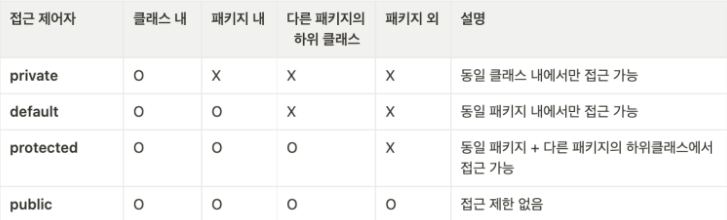

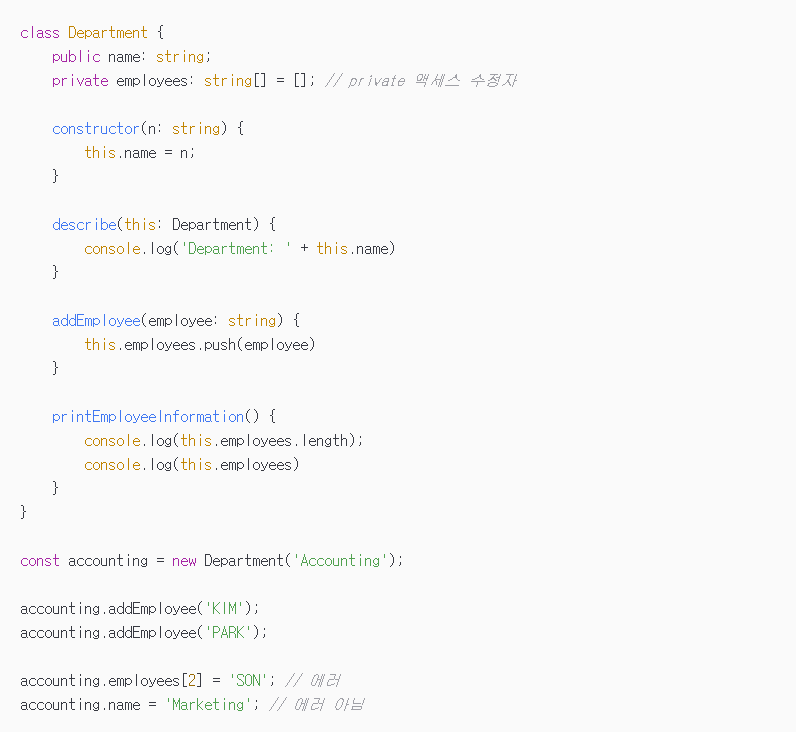

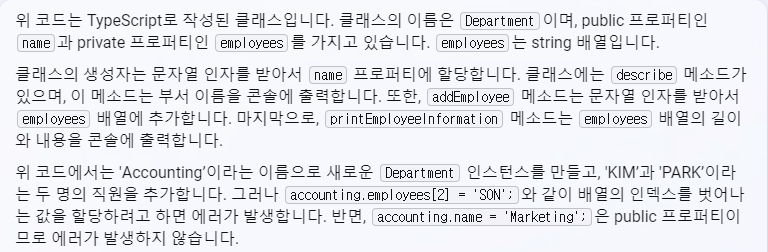

# 9.8 __slots __ 클래스 속성으로 공간 절약하기(Saving Space with the __slots __ Class Attribute)

* 기본적으로 파이썬은 객체 속성을 각 객체 안의 __dict __라는 딕셔너리형 속성에 저장
* 그러나 딕셔너리는 빠른 접근 속도 제공하기 위해 내부에 해시 테이블 유지하므로 메모리 사용량 부담이 상당히 크다
   * (복습) 책 141쪽
      * dict가 내부적으로 해시 테이블 사용하고 있고 해시가 제대로 작동하려면 빈 공간이 충분해야 하므로 dict의 메모리 공간 효율성은 높지 않다
      * 많은 양의 레코드를 처리하는 경우에는 JSON 형태로 각 레코드에 하나의 dict 할당해서 딕셔너리의 리스트 사용하는 것보다 튜플이나 명명된 튜플의 리스트에 저장하는 것이 좋다
      * dict를 튜플로 교체하면 레코드마다 하나의 해시 테이블 가져야 하는 부담과 레코다마다 필드명 다시 저장해야 하는 부담을 제거해 메모리 사용량 줄일 수 있다
      * 사용자 정의 자료형은 __slots __ 클래스 속성 이용해서 객체 속성 저장소를 dict에서 튜플로 변경할 수 있다
* 속성이 몇 개 없는 수백만 개 객체 다룬다면, __slots __ 클래스 속성 이용해 객체 속성을 딕셔너리 대신 튜플에 저장함으로써 메모리 사용량 줄일 수 있다
   * cf. 슈퍼클래스에서 상속받은 __slots __ 속성은 서브클래스에 영향 미치지 않고, 파이썬은 각 클래스에서 개별적으로 정의된 __slots __ 속성만 고려

In [ ]:
from array import array
import math

class Vector2d:
    __slots__ = ('__x', '__y')  # 이 부분 추가

    typecode = 'd'

    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
                bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __hash__(self):
        return hash(self.x) ^ hash(self.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        return math.atan2(self.y, self.x)

    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{}, {}>'
        else:
            coords = self
            outer_fmt = '({}, {})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(*components)

    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(*memv)

* 위에서 추가된 __slots __ = (' __ x ', ' __ y') 로 인해, 이 속성들을 튜플형 구조체에 저장함으로써 __dict __ 속성을 각 객체마다 유지하는 부담 덜고 메모리 사용량을 엄청나게 줄여줌
   * (TIP) 수백만 개 숫자 데이터 처리할 때는 NumPy 사용하는 것이 좋음(메모리를 효율적으로 사용할 뿐 아니라 숫자 처리에 상당히 최적화된 함수들을 가지고 있음)
* 아래와 같이 스크립트의 램 사용량이 1.5GB에서 655MB로 감소(책 344쪽 예제 9-12)

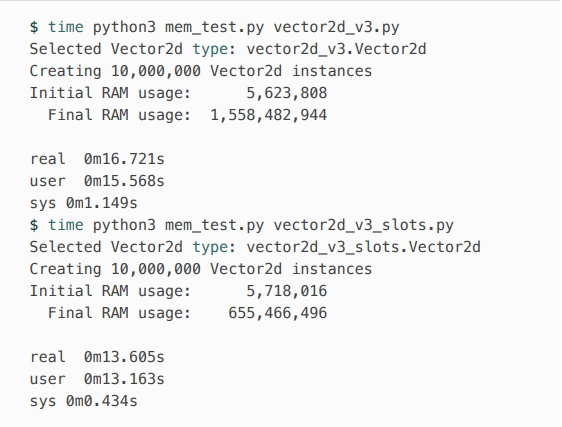

* **주의할 점**
   * 인터프리터는 상속된 __slots __ 속성 무시하므로 각 클래스마다 __slots __ 속성 다시 정의해야...
   * __dict __를 __slots __ 에 추가하지 않는 한 객체는 __slots __ 에 나열된 속성만 가질 수 있다(그러나 __dict __를 __slots __ 에 추가하면 메모리 절감 효과가 반감될 수...)
   * __weakref __를 __slots __ 에 추가하지 않으면 객체가 약한 참조 대상이 될 수 없다
* 따라서 프로그램이 수백만 개 객체를 다루는 경우라 아니라면, 굳이 동적 속성 받아들이지 않고 약한 참조 지원하지 않는 까다로운 클래스 만들 필요가 없고, 필요성이 정당화되고 효과가 증명된 경우에만 __slots __ 사용해야...
* __slots __를 단지 클래스의 사용자가 할당할 수 있는 속성을 제한하기 위해 사용해서는 안 된다
* 어설픈 최적화는 독이 되므로, (대용량의) 수치형 자료 다룰 때는 NumPy, 비수치형 자료 다룰 때는 pandas 사용하는 것이 better

# 9.9 클래스 속성 오버라이드(Overriding Class Attributes)

* 오버라이드(override): 상속받은 메서드 등을 자식 클래스에서 다시 정의하는 것
* 클래스 속성을 객체 속성의 기본값으로 사용하는 것이 파이썬의 독특한 특징
   * Vector2d 클래스의 typecode라는 클래스 속성은 __bytes __() 메서드에서 두 번 사용되고, self.typecode는 기본적으로 Vector2d.typecode 클래스 속성 가져온다
* 그러나 존재하지 않는 객체 속성에 값 저장하면 새로운 객체 속성 생성하고 동일한 이름의 클래스 속성은 변경하지 않음
   * 그 후부터는 객체가 self.typecode 읽을 때 객체 자체의 typecode 가져오므로, 각 객체가 서로 다른 typecode 갖도록 커스터마이즈할 수 있게 됨

In [ ]:
from array import array
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
                bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __hash__(self):
        return hash(self.x) ^ hash(self.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        return math.atan2(self.y, self.x)

    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{}, {}>'
        else:
            coords = self
            outer_fmt = '({}, {})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(*components)

    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(*memv)

In [ ]:
v1 = Vector2d(1.1, 2.2)
dumpd = bytes(v1)
dumpd

b'd\x9a\x99\x99\x99\x99\x99\xf1?\x9a\x99\x99\x99\x99\x99\x01@'

In [ ]:
len(dumpd)          # 기본적인 bytes 표현은 17바이트 길이

17

1. 객체 속성을 생성해서 오버라이드하는 방법

In [ ]:
v1.typecode = 'f'   # 종전의 typecode는 'd'였으나, 객체 익스포트 전 typecode를 'f'로 설정

In [ ]:
dumpf = bytes(v1)
dumpf

b'f\xcd\xcc\x8c?\xcd\xcc\x0c@'

In [ ]:
len(dumpf)         # 이제 bytes 덤프 길이가 9바이트가 됨

9

In [ ]:
Vector2d.typecode   # 클래스 속성은 기존의 'd'에서 변경되지 않고 v1 객체의 typecode만 'f'가 된 것

'd'

* bytes 익스포트 앞에 typecode가 오게 한 것도 다양한 익스포트 포맷 지원하기 위함
* 클래스 속성 변경하려면 클래스 정의에서 직접 바꿔야 하고, 객체 통해 변경하면 안 된다
* 다음과 같이 클래스 속성 변경하면 자기만의 typecode 갖지 않은 모든 객체의 기본 typecode도 바뀐다

In [ ]:
Vector2d.typecode = 'f'

In [ ]:
Vector2d.typecode

'f'

In [ ]:
len(dumpf)

9

In [ ]:
v3 = Vector2d(1, 2)
len(bytes(v3))

9

In [ ]:
from array import array
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
                bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __hash__(self):
        return hash(self.x) ^ hash(self.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        return math.atan2(self.y, self.x)

    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{}, {}>'
        else:
            coords = self
            outer_fmt = '({}, {})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(*components)

    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(*memv)

2. 클래스를 상속해서 서브클래스의 클래스 수준에서 덮어쓰는 방법

In [ ]:
class ShortVector2d(Vector2d):   # ShortVector2d를 Vector2d의 서브클래스로 만들어서 typecode 클래스 속성만 덮어 쓴다
  typecode = 'f'

In [ ]:
sv = ShortVector2d(1/11, 1/27)   # ShortVector2d 객체 sv 생성
sv                               # sv의 repr() 조사

ShortVector2d(0.09090909090909091, 0.037037037037037035)

In [ ]:
len(bytes(sv))                   # 익스포트된 bytes 확인(17바이트가 아니라 9바이트)

9

* 위 예제를 보면 __repr __() 메서드에서 class_name 하드코딩하지 않고 객체의 type에서 이름 읽어오도록 만든 이유를 알 수 있다
* 클래스 상속하더라도 __repr __() 안전하게 사용하기 위함
* 하드코딩했다면 class_name 변경 위해 서브클래스의 __repr __() 메서드도 변경해야 했을 것

# 9.10 요약(Chapter Summary)

* Simple is better than complex.
* 문자열/바이트로 표현하는 모든 메서드: __repr __(), __str __(), __format __(), __bytes __()
* 객체를 숫자로 변환하는 여러 메서드: __abs __(), __bool __(), __hash __()
* bytes 로 변환하고 해시할 수 있게 해주는 메서드: __eq __(), __hash __()

# 9.11 읽을거리(Further Reading)

# 새 섹션

* 데이터 모델의 여러 특별 메서드에 대해 설명했으므로, 1장과 참고문헌이 동일
   * "Data Model" chapter of The Python Language Reference [3.3.1. Basic customization](https://docs.python.org/3/reference/datamodel.html#basic-customization)
   * [Python in a Nutshell, 2nd Edition](https://www.oreilly.com/library/view/python-in-a/0596100469/), by Alex Martelli
   * [Python Cookbook, 3rd Edition](https://www.oreilly.com/library/view/python-cookbook-3rd/9781449357337/), by David Beazley and Brian
K. Jones
   * Python Essential Reference, 4th Edition, by David Beazley
Covers
* __index __()에 관심이 있다면...
   * A.M. Kuchling, [What’s New in Python 2.5](https://docs.python.org/2.5/whatsnew/pep-357.html)
   * Travis
Oliphant, [PEP 357 — Allowing Any Object to be
Used for Slicing](https://peps.python.org/pep-0357/)
* Bobby Woolf, ["How to Display an Object as a String: printString and
displayString"](http://esug.org/data/HistoricalDocuments/TheSmalltalkReport/ST07/04wo.pdf)
   * repr(): 개발자가 보고자 하는 형태로 표현
   * str(): 사용자가 보고자 하는 형태로 표현
* 뒷이야기
   * 자바에서도 접근 제어 지시자는 안전을 위한 장치이지 보안을 위한 기능이 아니다
   * 보안관리자와 함께 배포하지 않으면 바이트코드 읽어서 쉽게 해당 필드를 읽을 수 있다
   * 그러니 파이썬이 제공하는 강력한 기능을 편히 즐겨라!